# Final Project Exploratory Analysis
Melissa Medeiros - September 19, 2018

## Outline
Set up & standard exploratory analysis

Time series analysis

Comparison to weather data set

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import datetime as dt

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default chart size for notebook

# Import and clean the data sets
There is a time series for chickenpox, measles and mumps

In [319]:
chickenpox = pd.read_csv('nyc_chickenpox.csv', converters={'Month':pd.to_datetime})
chickenpox.columns = ['month','chickenpox']

measles = pd.read_csv('nyc_measles.csv', converters={'Month':pd.to_datetime})
measles.columns = ['month','measles']

mumps = pd.read_csv('nyc_mumps.csv', converters={'Month':pd.to_datetime})
mumps.columns = ['month','mumps']

In [320]:
print('Chickenpox start: {}, end: {}'.format(chickenpox.month[0], chickenpox.month[len(chickenpox)-1]))
print('Measles start: {}, end: {}'.format(measles.month[0], measles.month[len(measles)-1]))
print('Mumps start: {}, end: {}'.format(mumps.month[0], mumps.month[len(mumps)-1]))

Chickenpox start: 1931-01-01 00:00:00, end: 1972-06-01 00:00:00
Measles start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00
Mumps start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00


## Combine the data sets 
All three time series end June 1972, but measles/mumps start before chickenpox

In [363]:
data = measles.merge(mumps.merge(chickenpox, how='left'), how='left')
data.head()

,month,measles,mumps,chickenpox
0,1928-01-01,609,124,NaN
1,1928-02-01,1516,132,NaN
2,1928-03-01,4952,193,NaN
3,1928-04-01,7466,144,NaN
4,1928-05-01,11155,195,NaN


In [364]:
data.tail() # note: chickenpox has been converted to a float since it now includes NaN values

,month,measles,mumps,chickenpox
529,1972-02-01,35,157,463.0
530,1972-03-01,40,219,690.0
531,1972-04-01,31,221,847.0
532,1972-05-01,41,264,1121.0
533,1972-06-01,32,298,1048.0


## Save 1971 and beyond as the 'future'
We will ignore this for all our EDA and training / testing

In [365]:
the_future = data[data.month>='1971-1-1']
data = data[data.month<'1971-1-1']

In [366]:
data.tail()

,month,measles,mumps,chickenpox
511,1970-08-01,39,147,137.0
512,1970-09-01,40,104,58.0
513,1970-10-01,52,90,134.0
514,1970-11-01,58,77,71.0
515,1970-12-01,143,122,142.0


# EDA

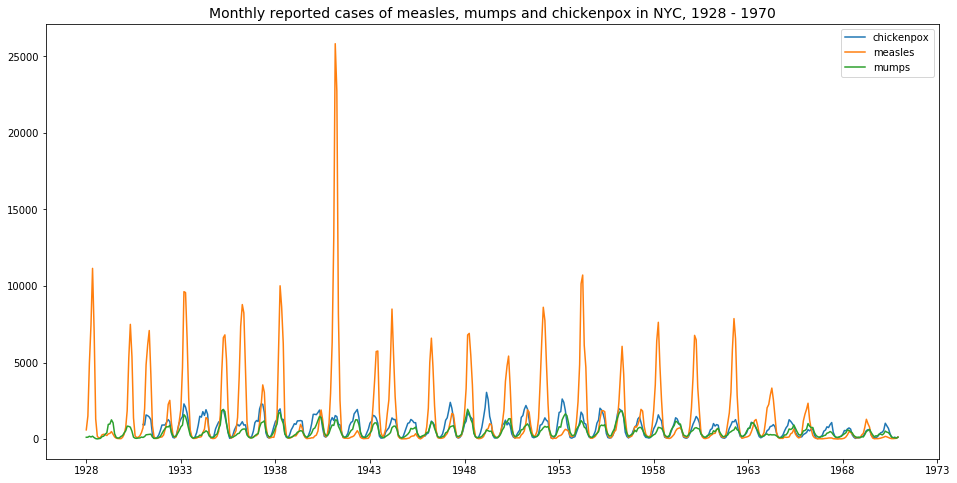

In [367]:
# Plot all the series - measles are clearly on a different scale
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of measles, mumps and chickenpox in NYC, 1928 - 1970', fontsize=14)
plt.plot(data.month, data[['chickenpox','measles','mumps']])
plt.legend(['chickenpox','measles','mumps'])
plt.show()

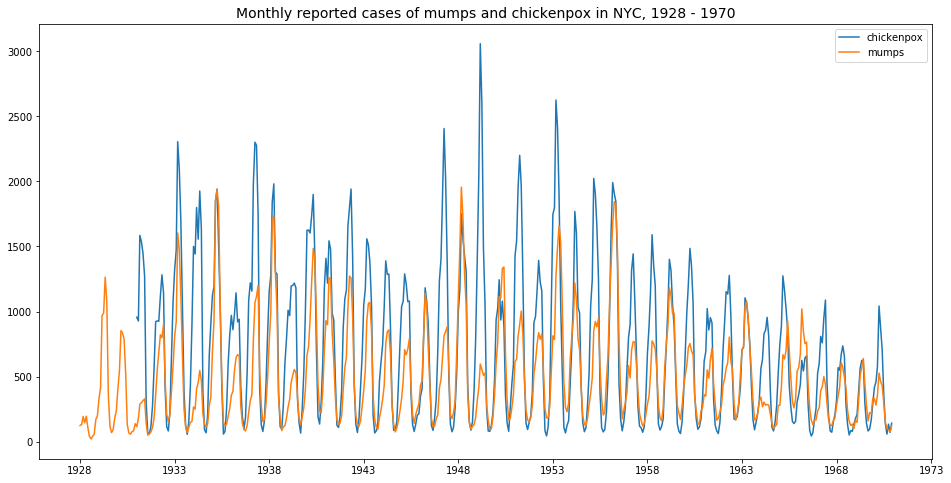

In [368]:
# Plot mumps and chickenpox - measles are obscuring these
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of mumps and chickenpox in NYC, 1928 - 1970', fontsize=14)
plt.plot(data.month, data[['chickenpox','mumps']])
plt.legend(['chickenpox','mumps'])
plt.show()

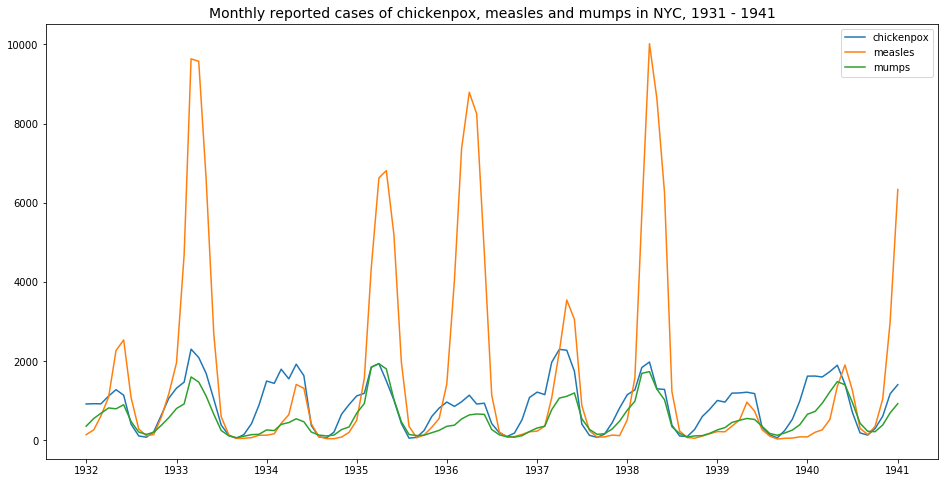

In [369]:
# Plot all three over a shorter time period
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox, measles and mumps in NYC, 1931 - 1941', fontsize=14)
plt.plot(data.month[48:157], data[['chickenpox','measles','mumps']][48:157]) 
plt.legend(['chickenpox','measles','mumps'])
plt.show()

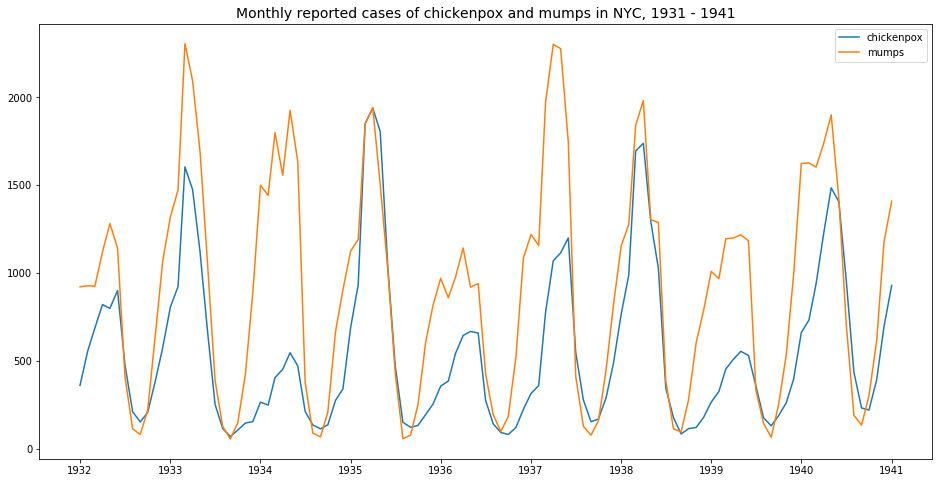

In [370]:
# Plot mumps + chickenpox over a shorter time period
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox and mumps in NYC, 1931 - 1941', fontsize=14)
plt.plot(data.month[48:157], data.mumps[48:157])  
plt.plot(data.month[48:157], data.chickenpox[48:157])  
plt.legend(['chickenpox','mumps'])
plt.show()

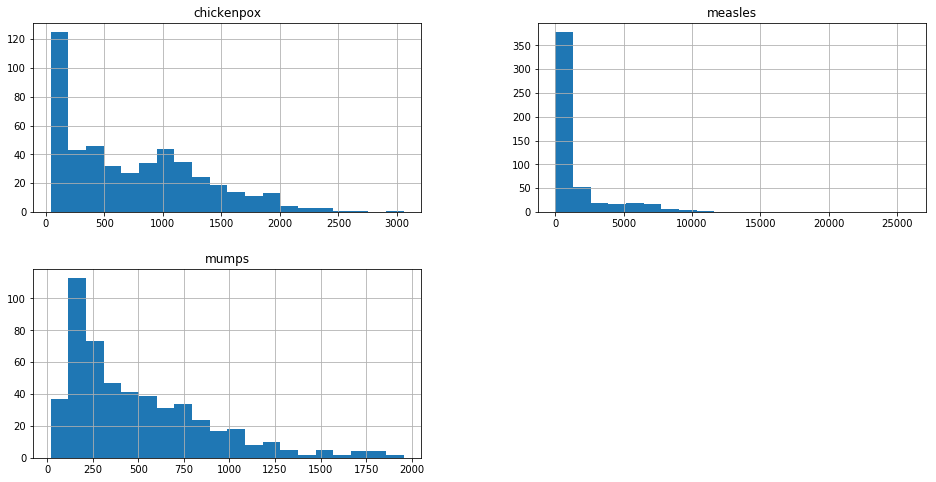

In [371]:
# See the distributions of each
data.hist(bins=20)#, figsize=(12,8))
plt.show()

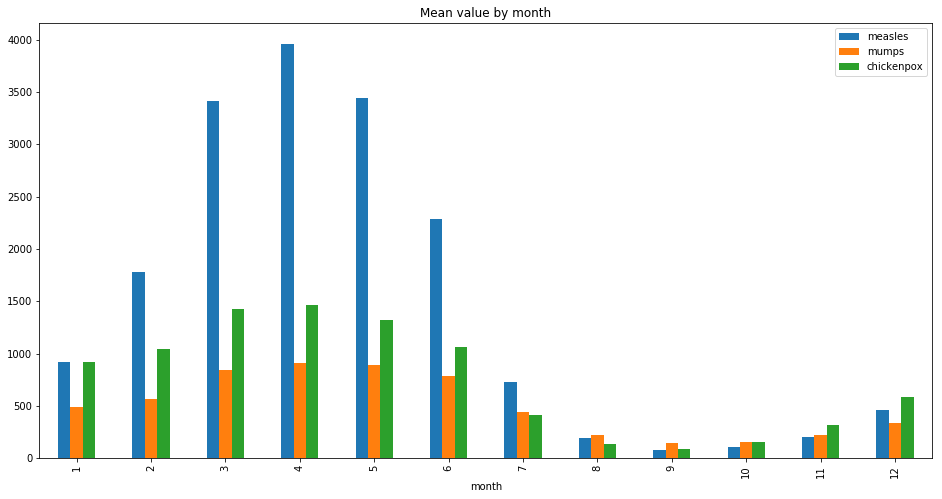

In [372]:
data.groupby(data.month.dt.month).mean().plot(kind='bar')#, figsize=(12,8))
plt.title('Mean value by month')
plt.show()

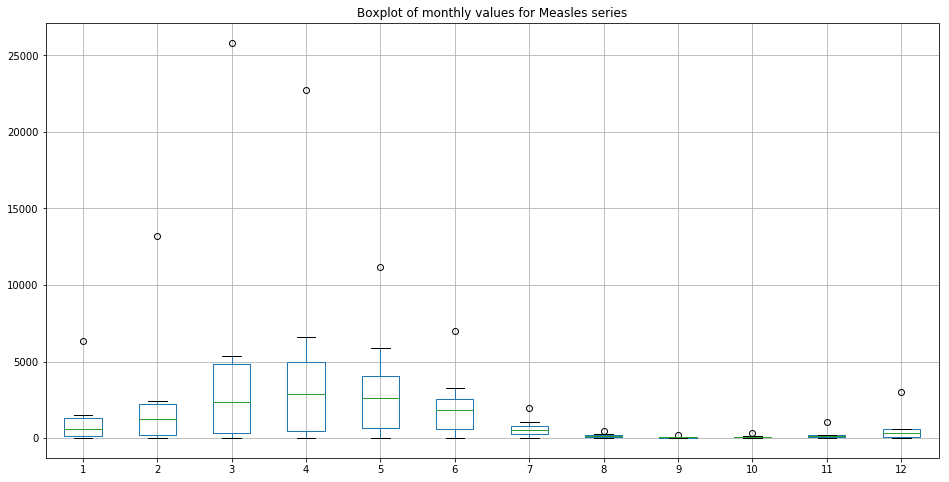

In [373]:
data.groupby(data.month.dt.month).measles.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Measles series')
plt.show()

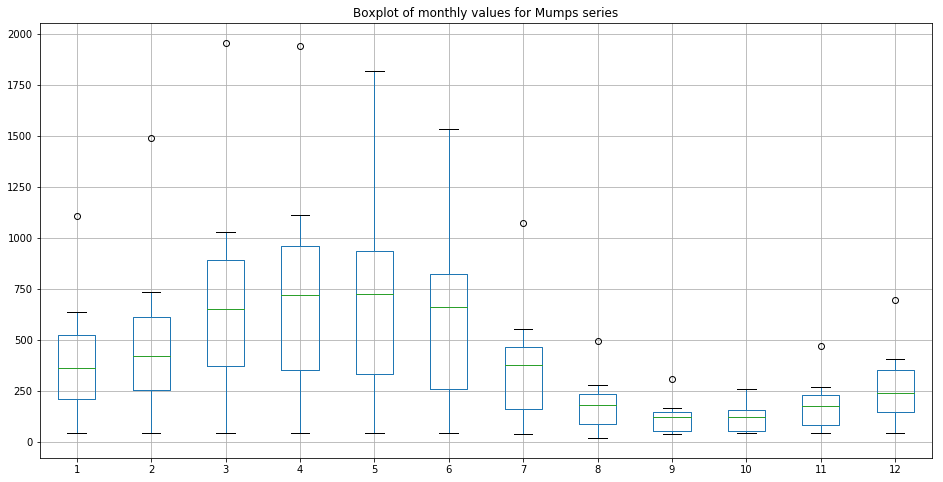

In [374]:
data.groupby(data.month.dt.month).mumps.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Mumps series')
plt.show()

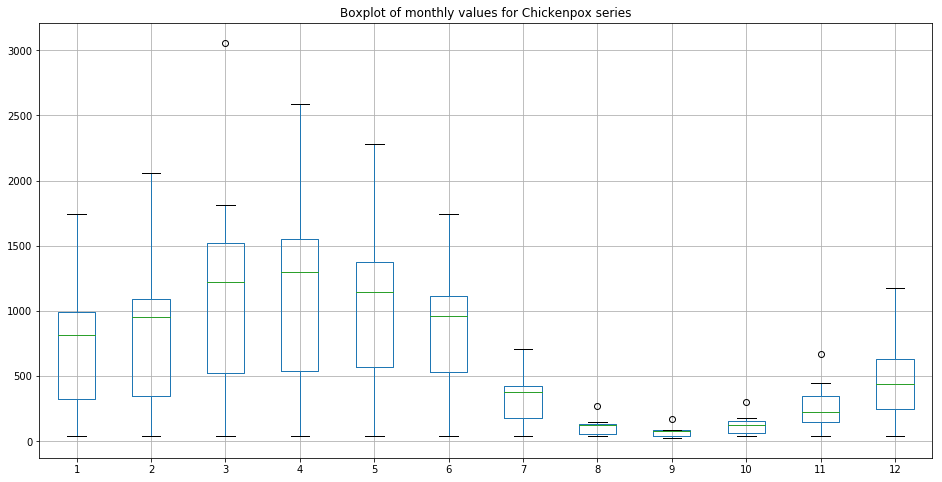

In [375]:
data.groupby(data.month.dt.month).chickenpox.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Chickenpox series')
plt.show()

Month 1:


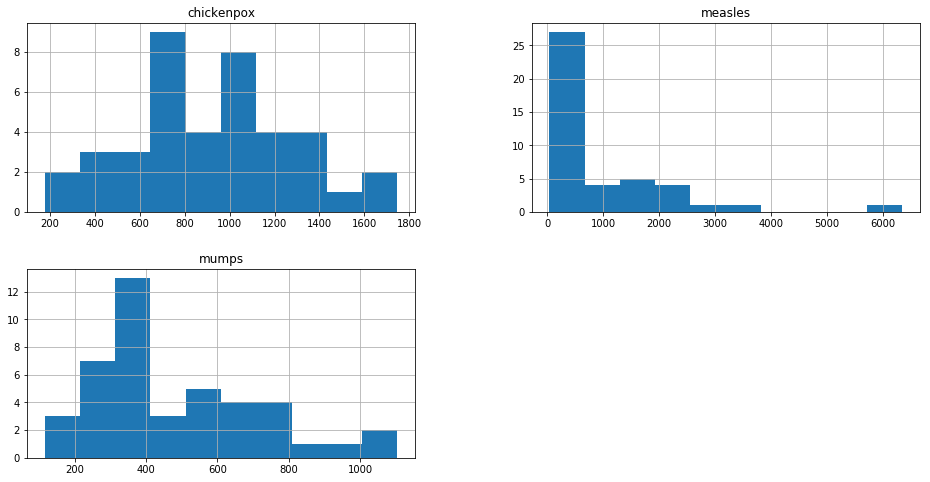


Month 2:


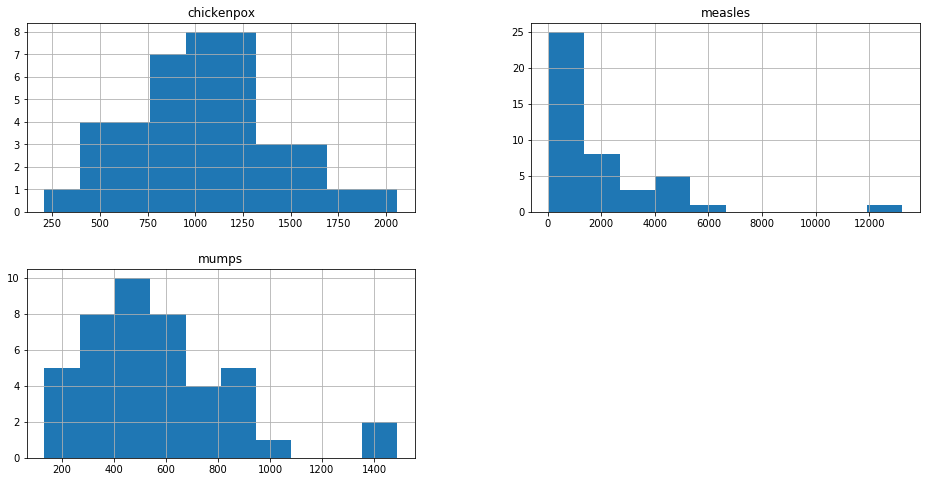


Month 3:


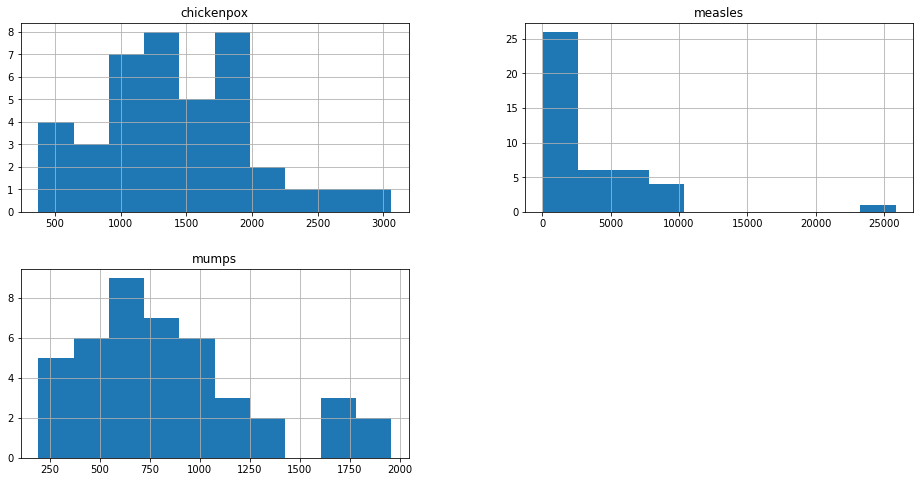


Month 4:


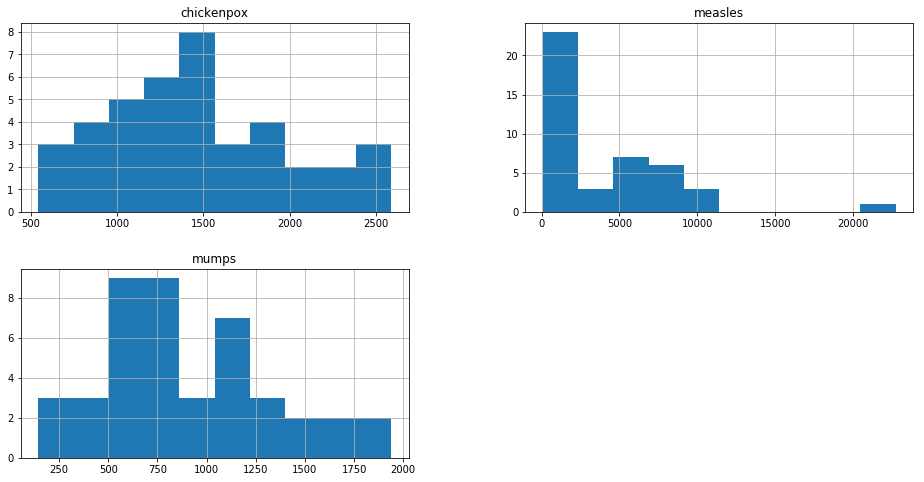


Month 5:


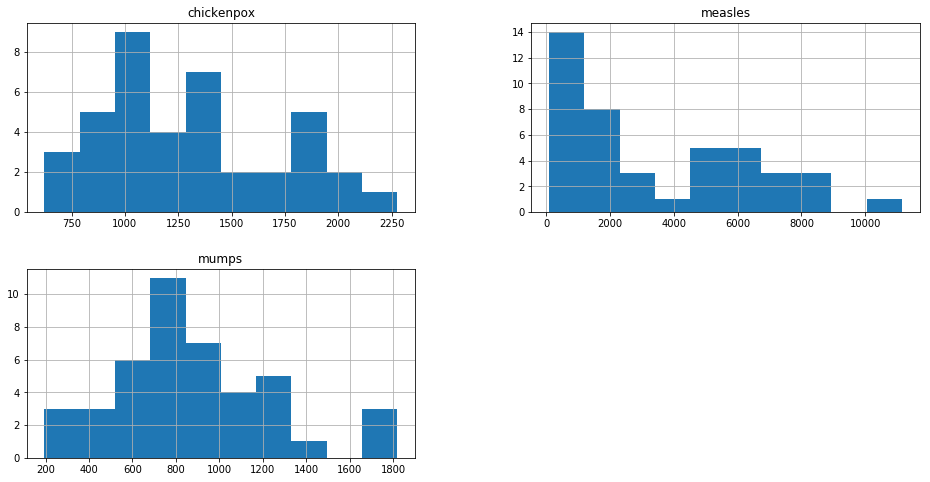


Month 6:


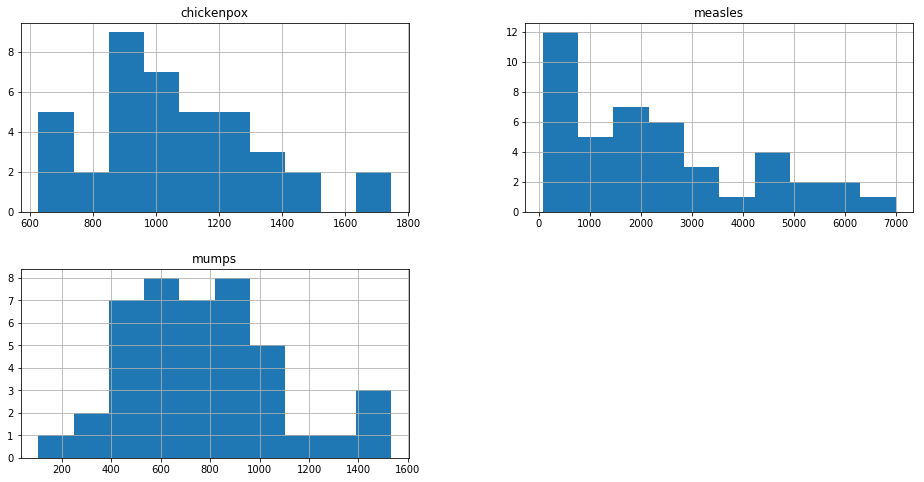


Month 7:


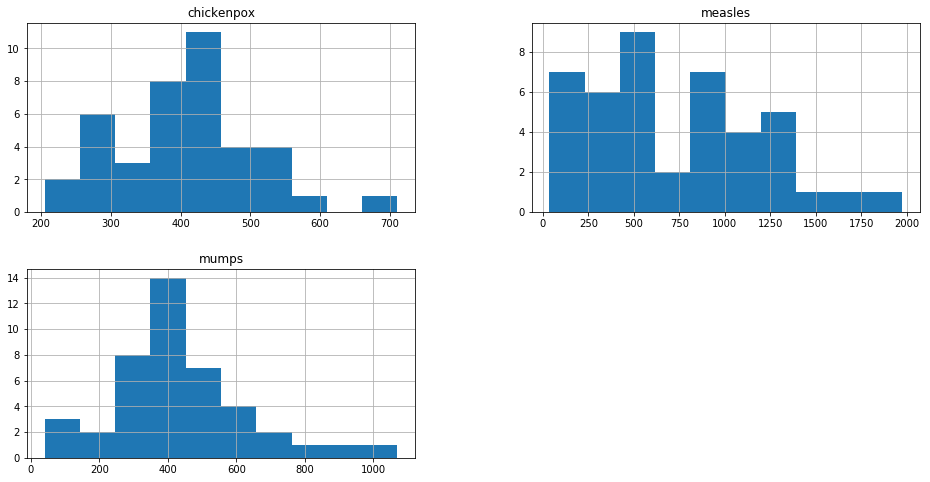


Month 8:


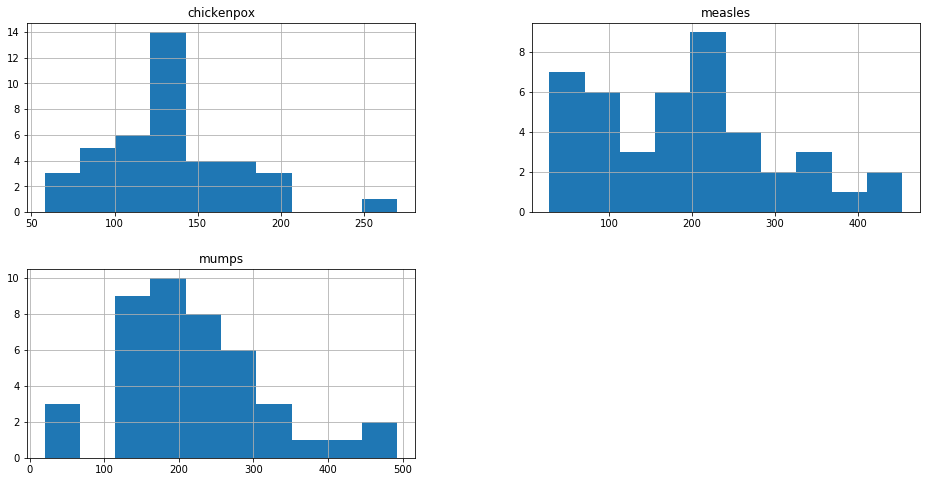


Month 9:


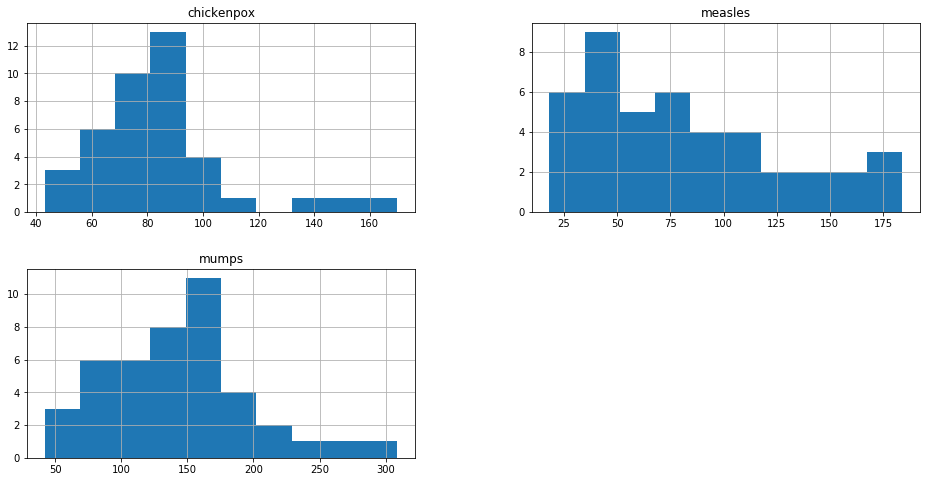


Month 10:


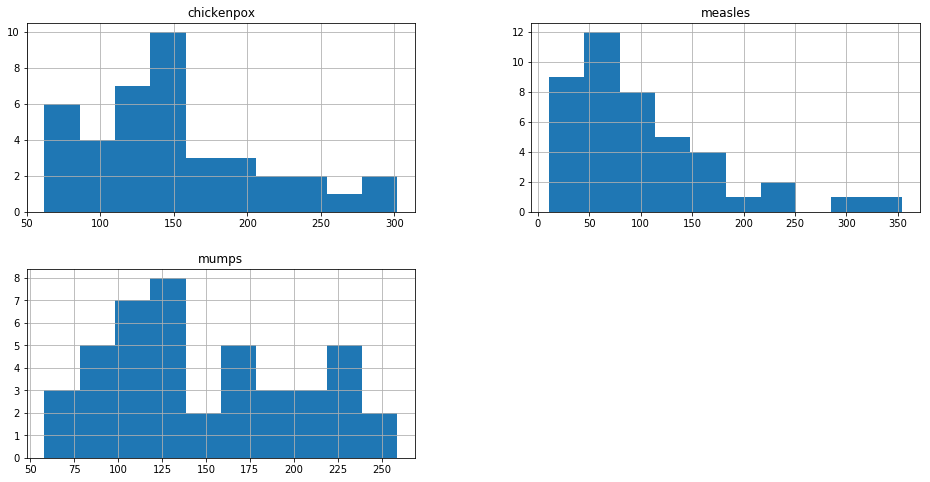


Month 11:


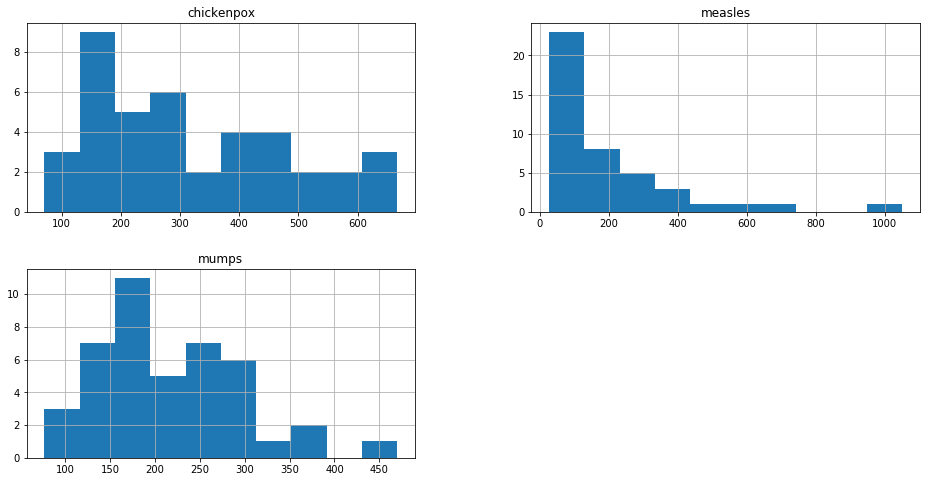


Month 12:


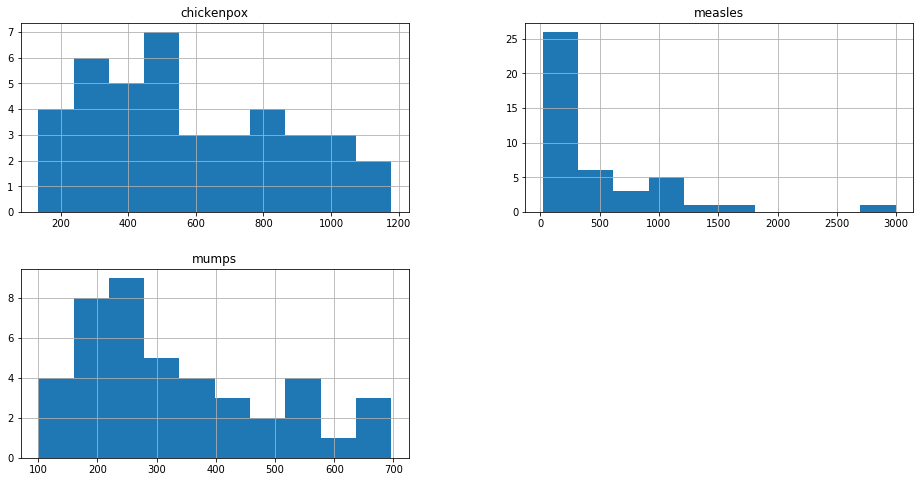

In [376]:
# check histograms by month
for x in list(range(12)):
    x = x + 1
    print('Month {}:'.format(x))
    data[data['month'].dt.month==x].hist()#figsize=(12,8))
    plt.show()
    print('')

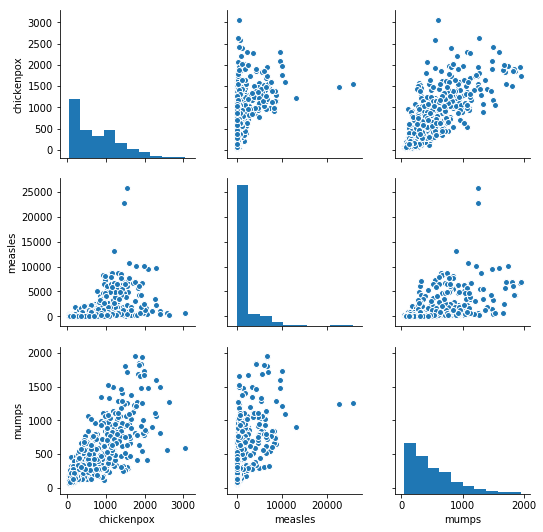

In [377]:
# are the series correlated with each other?
sns.pairplot(data.dropna()[['chickenpox','measles','mumps']])
plt.show()

In [378]:
data.dropna()[['chickenpox','measles','mumps']].corr()

,chickenpox,measles,mumps
chickenpox,1.000000,0.454494,0.757273
measles,0.454494,1.000000,0.543733
mumps,0.757273,0.543733,1.000000


## Import and clean weather dataset
Central Park Monthly Avg Temp and Precipitation from 1869 - 2018:
- https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf
- https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualprecip.pdf

In [379]:
# Function to convert PDF tables into CSVs using https://pdftables.com/
# Only get 50 free calls to the API! 
def pdfToTable(PDFfilename, apiKey, fileExt, downloadDir):

    fileData = (PDFfilename, open(PDFfilename, 'rb')) #"rb" stands for "read bytes"
    files = {'f': fileData} 
    postUrl = "https://pdftables.com/api?key={0}&format={1}".format(apiKey, fileExt)

    response = requests.post(postUrl, files=files)
    response.raise_for_status() # ensure we notice bad responses

    with open(downloadDir, "wb") as f:
        f.write(response.content) #write data to csv

#### Monthly avg temp data

In [380]:
# import monthly temp data
# don't run this over and over again - will run out of API credits
#pdfToTable('centralpark_monthlyannualtemp.pdf', 'fehzjlvcj5ky', 'csv', 'centralpark_monthlyannualtemp.csv')
temp = pd.read_csv('centralpark_monthlyannualtemp.csv', header=2)
temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4
1,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6
2,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1
3,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0
4,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0


In [381]:
# clean up:
# remove rows with repeated column names from original PDF
temp = temp[temp['YEAR']!='YEAR'] 

# convert YEAR to int
temp['YEAR'] = temp['YEAR'].astype(int) 

# keep relevant years
temp = temp[(temp.YEAR>=1928) & (temp.YEAR<=1972)] 

# convert month values to floats
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
          'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']

temp[months] = temp[months].astype(float)

# drop ANNUAL column
temp.drop('ANNUAL', axis=1, inplace=True)

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 60 to 105
Data columns (total 13 columns):
YEAR    45 non-null int64
JAN     45 non-null float64
FEB     45 non-null float64
MAR     45 non-null float64
APR     45 non-null float64
MAY     45 non-null float64
JUN     45 non-null float64
JUL     45 non-null float64
AUG     45 non-null float64
SEP     45 non-null float64
OCT     45 non-null float64
NOV     45 non-null float64
DEC     45 non-null float64
dtypes: float64(12), int64(1)
memory usage: 4.9 KB


In [382]:
temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
60,1928,34.0,33.0,38.8,48.4,59.4,67.4,75.9,75.4,64.7,58.9,47.4,39.3
61,1929,31.9,32.9,45.1,51.0,61.7,71.5,75.9,73.1,69.4,54.6,46.2,35.8
62,1930,33.3,37.0,40.3,48.4,63.7,73.5,76.4,73.6,72.0,55.6,45.5,34.6
63,1931,32.8,33.9,40.3,51.1,61.5,70.7,77.5,75.2,72.3,61.3,51.9,41.0
64,1932,43.2,36.1,37.3,49.0,62.0,70.5,76.1,76.7,69.5,58.5,43.9,39.1


In [383]:
temp_list = []

for _, row in temp.iterrows():
    for month in range(1,13):
        temp_list.append(row[month])
    
temp_list[:5]

[34.0, 33.0, 38.799999999999997, 48.399999999999999, 59.399999999999999]

In [384]:
date_list = []

for year in range(1928,1973):
    for month in range(1,13):
        date_list.append(dt.date(year,month,1))
        
date_list[:5]

[datetime.date(1928, 1, 1),
 datetime.date(1928, 2, 1),
 datetime.date(1928, 3, 1),
 datetime.date(1928, 4, 1),
 datetime.date(1928, 5, 1)]

In [385]:
temp_series = pd.Series(temp_list, index=date_list, name='temp')
temp_series.head()

1928-01-01    34.0
1928-02-01    33.0
1928-03-01    38.8
1928-04-01    48.4
1928-05-01    59.4
Name: temp, dtype: float64

In [386]:
# save the future (1971 - 1972)
temp_future = temp_series[temp_series.index>=dt.date(1971,1,1)]
temp_series = temp_series[temp_series.index<dt.date(1971,1,1)]
temp_series.tail()

1970-08-01    77.6
1970-09-01    70.8
1970-10-01    58.9
1970-11-01    48.5
1970-12-01    34.4
Name: temp, dtype: float64

#### Monthly avg precipitation data

In [387]:
# monthly precipitation data
# don't run this over and over again - will run out of API credits
#pdfToTable('centralpark_monthlyannualprecip.pdf', 'fehzjlvcj5ky', 'csv', 'centralpark_monthlyannualprecip.csv')
precip = pd.read_csv('centralpark_monthlyannualprecip.csv', header=2)
precip.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,2.53,6.87,4.61,1.39,4.15,4.40,3.20,1.76,2.81,6.48,2.03,5.02,45.25
1,1870,4.41,2.83,3.33,5.11,1.83,2.82,3.76,3.07,2.52,4.97,2.42,2.18,39.25
2,1871,2.07,2.72,5.54,3.03,4.04,7.05,5.57,5.60,2.34,7.50,3.56,2.24,51.26
3,1872,1.88,1.29,3.74,2.29,2.68,2.93,7.83,6.29,2.95,3.35,4.08,3.18,42.49
4,1873,5.34,3.80,2.09,4.16,3.69,1.28,4.61,9.56,3.14,2.73,4.63,2.96,47.99


In [388]:
# clean up:
# remove rows with repeated column names from original PDF
precip = precip[precip['YEAR']!='YEAR'] 

# convert YEAR to int
precip['YEAR'] = precip['YEAR'].astype(int) 

# keep relevant years
precip = precip[(precip.YEAR>=1928) & (precip.YEAR<=1972)] 

# convert month values to floats
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
          'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']

precip[months] = precip[months].astype(float)

# drop ANNUAL column
precip.drop('ANNUAL', axis=1, inplace=True)

precip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 60 to 105
Data columns (total 13 columns):
YEAR    45 non-null int64
JAN     45 non-null float64
FEB     45 non-null float64
MAR     45 non-null float64
APR     45 non-null float64
MAY     45 non-null float64
JUN     45 non-null float64
JUL     45 non-null float64
AUG     45 non-null float64
SEP     45 non-null float64
OCT     45 non-null float64
NOV     45 non-null float64
DEC     45 non-null float64
dtypes: float64(12), int64(1)
memory usage: 4.9 KB


In [389]:
precip_list = []

for _, row in precip.iterrows():
    for month in range(1,13):
        precip_list.append(row[month])
    
precip_list[:5]

[1.8700000000000001,
 4.8399999999999999,
 2.8300000000000001,
 4.8300000000000001,
 2.0699999999999998]

In [390]:
precip_series = pd.Series(precip_list, index=date_list, name='precip')
precip_series.head()

1928-01-01    1.87
1928-02-01    4.84
1928-03-01    2.83
1928-04-01    4.83
1928-05-01    2.07
Name: precip, dtype: float64

In [391]:
# save the future (1971 - 1972)
precip_future = precip_series[precip_series.index>=dt.date(1971,1,1)]
precip_series = precip_series[precip_series.index<dt.date(1971,1,1)]
precip_series.tail()

1970-08-01    2.47
1970-09-01    1.74
1970-10-01    2.48
1970-11-01    5.14
1970-12-01    2.82
Name: precip, dtype: float64

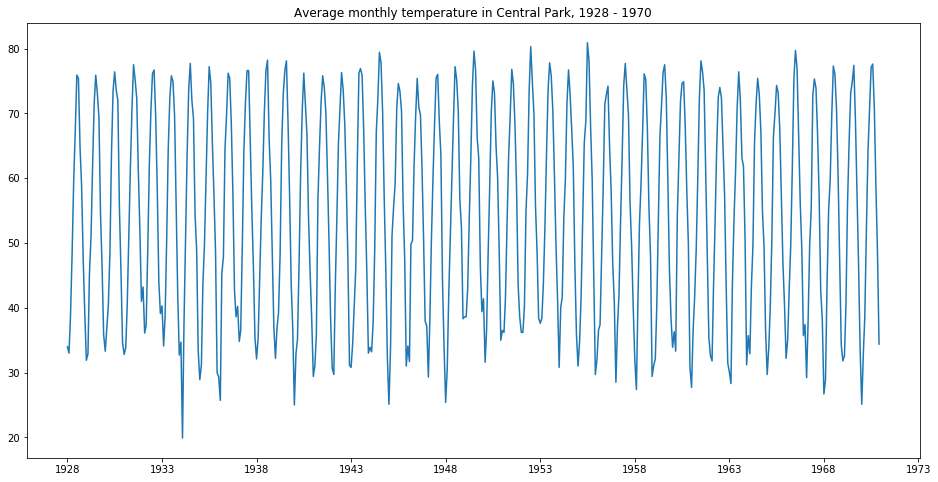

In [480]:
plt.plot(temp_series)
plt.title('Average monthly temperature in Central Park, 1928 - 1970')
plt.show()

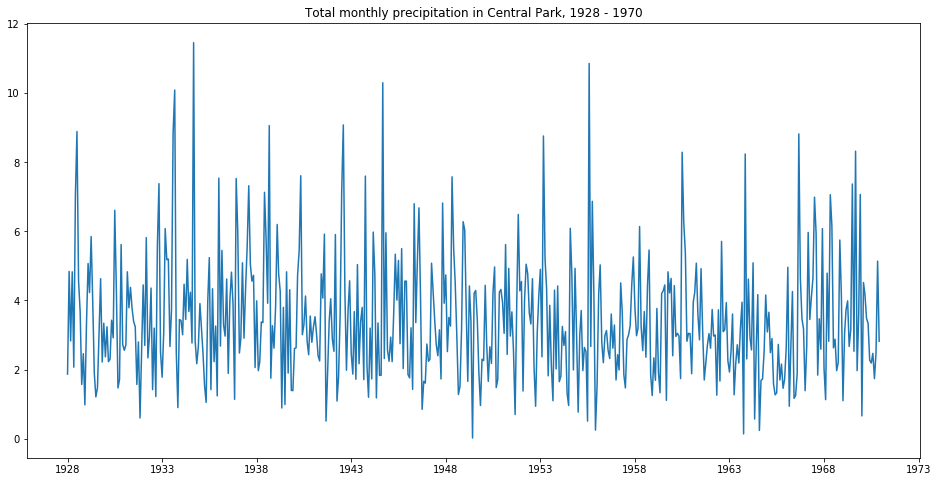

In [475]:
plt.plot(precip_series)
plt.title('Total monthly precipitation in Central Park, 1928 - 1970')
plt.show()

### Compare weather to mumps

In [463]:
mumps_series = pd.Series(data[['month','mumps']].set_index('month').mumps)
mumps_series.head()

month
1928-01-01    124
1928-02-01    132
1928-03-01    193
1928-04-01    144
1928-05-01    195
Name: mumps, dtype: int64

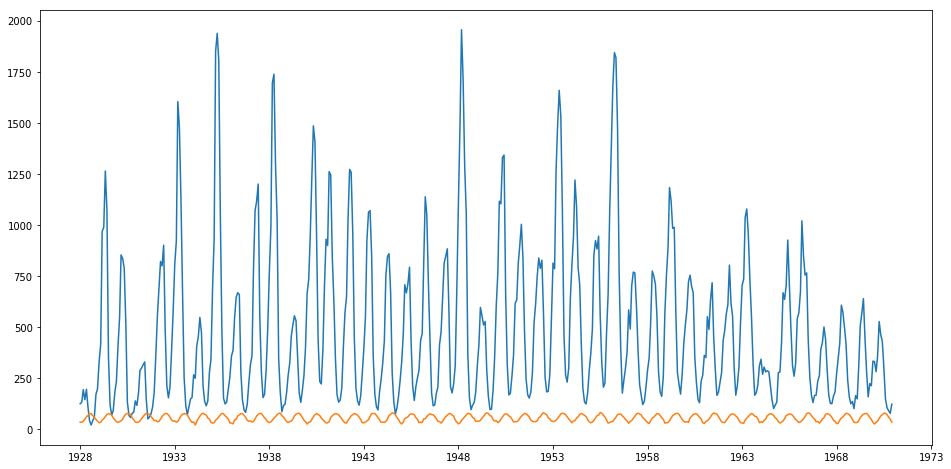

In [464]:
# plot next to mumps
plt.plot(mumps_series)
plt.plot(temp_series)
plt.show()

In [477]:
np.corrcoef(mumps_series, temp_series) # not a very strong correlation

array([[ 1.        , -0.10105162],
       [-0.10105162,  1.        ]])

In [466]:
np.corrcoef(mumps_series, precip_series) # even worse!

array([[ 1.        , -0.04028069],
       [-0.04028069,  1.        ]])

In [479]:
# any correlation with measles?
measles_series = pd.Series(data[['month','measles']].set_index('month').measles)
np.corrcoef(measles_series, temp_series) # still bad

array([[ 1.        , -0.07950928],
       [-0.07950928,  1.        ]])

In [471]:
np.corrcoef(measles_series, precip_series) # quite terrible

array([[ 1.        , -0.00508611],
       [-0.00508611,  1.        ]])

# Time series analysis - mumps

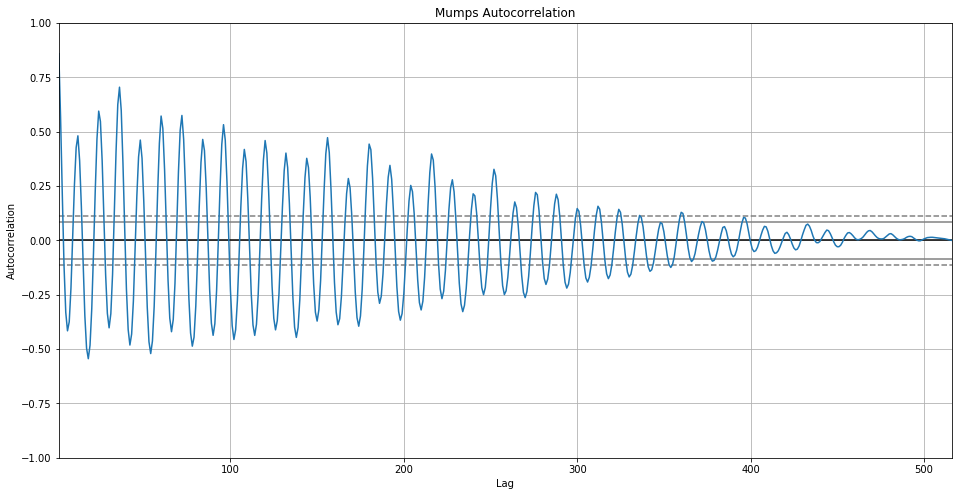

In [440]:
# check if autocorrelation is 'high' for a certain lag
#plt.figure(figsize=(12,8))
autocorrelation_plot(mumps_series)
plt.title('Mumps Autocorrelation')
plt.show()

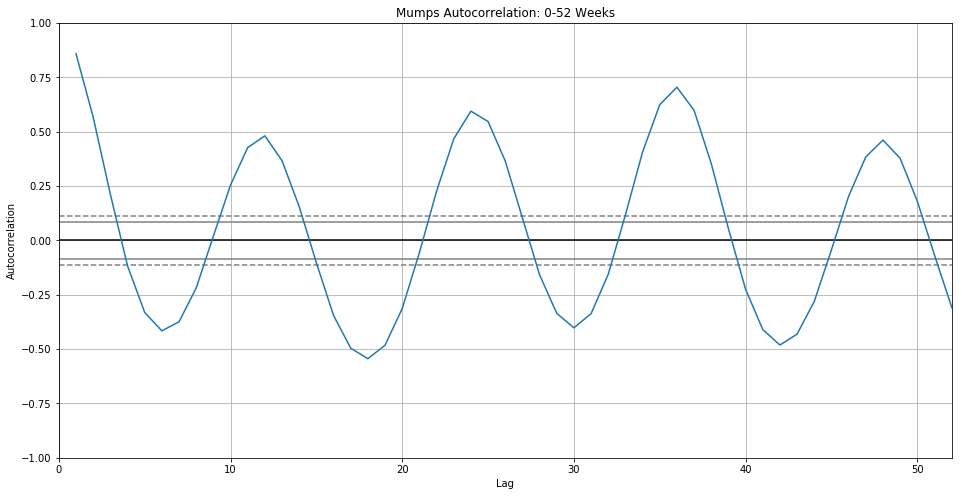

In [441]:
# check if autocorrelation for the first x lags
#plt.figure(figsize=(12,8))
autocorrelation_plot(mumps_series)
plt.title('Mumps Autocorrelation: 0-52 Weeks')
plt.xlim(0,52)
plt.show()

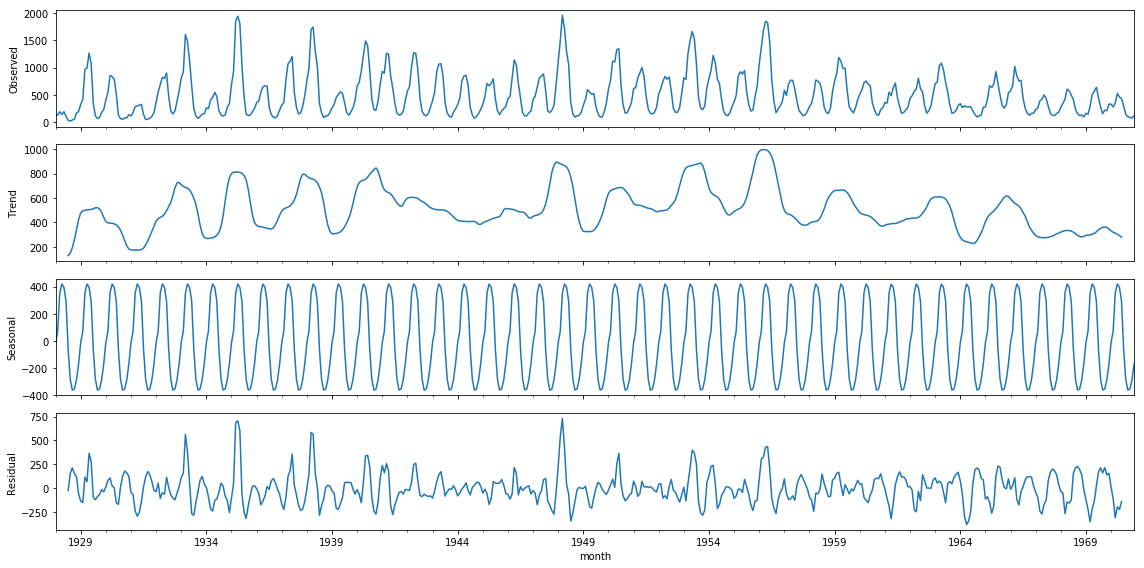

In [442]:
# quick decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose 
#mumps_series = data[['month','mumps']].set_index('month')

# model options = additive or multiplicative
# freq parameter??? freq=12 ?
result = seasonal_decompose(mumps_series, model='additive') 
result.plot()
plt.show()

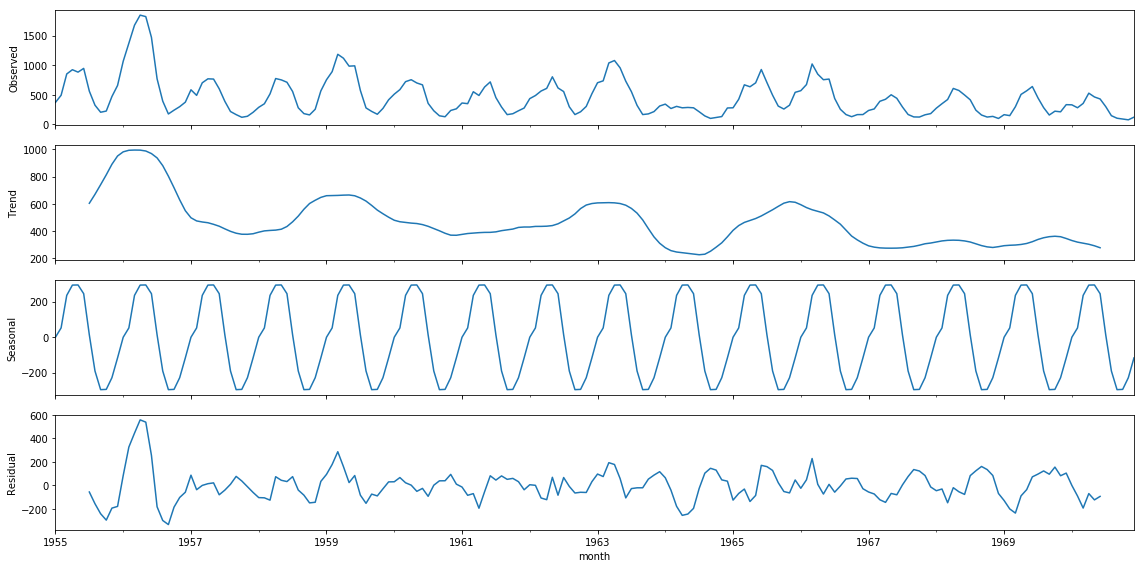

In [443]:
# what does it look like for a shorter, more recent period?
short_mumps_series = data[data.month>='1955-1-1'][['month','mumps']].set_index('month')

# model options = additive or multiplicative
# freq parameter??? freq=12 ?
result = seasonal_decompose(short_mumps_series, model='additive') 
result.plot()
plt.show()

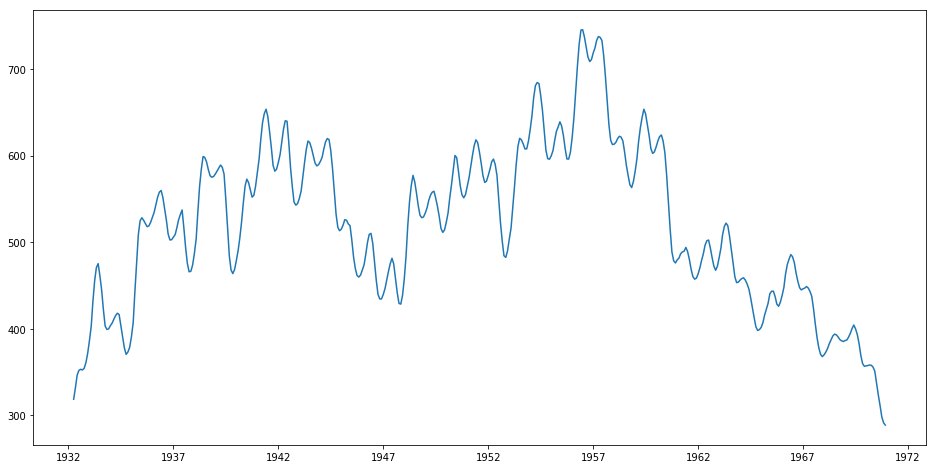

In [444]:
# Look at the moving average of the series
#plt.figure(figsize=(12,8)) # use plt.rcParams['figure.figsize'] = (16.0, 8.0) as default for notebook!
plt.plot(mumps_series.rolling(52).mean())
plt.show()

## Time Series Analysis & Forecasting  - GA curriculum
https://github.com/medemel/my-dat-sf-49/tree/master/lessons/17
### Time Series Analysis

#### Check for autocorrelation
Autocorrelation is a measure of how correlated a variable is with itself
- Compares lagged values of the series

In [445]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [446]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

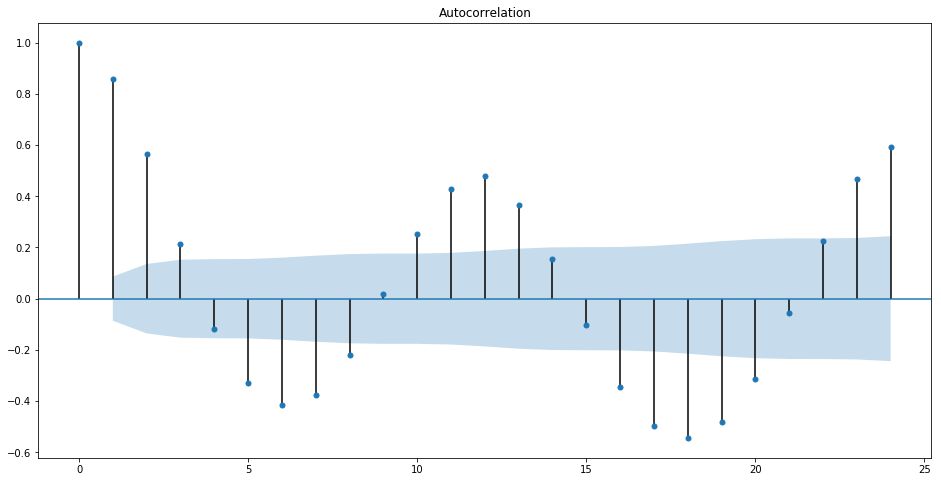

In [447]:
plot_acf(mumps_series.values, lags=24)
plt.show()

#### Check for partial autocorrelation
Correlation at a given lag, controlling for the effect of previous lags

In [118]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

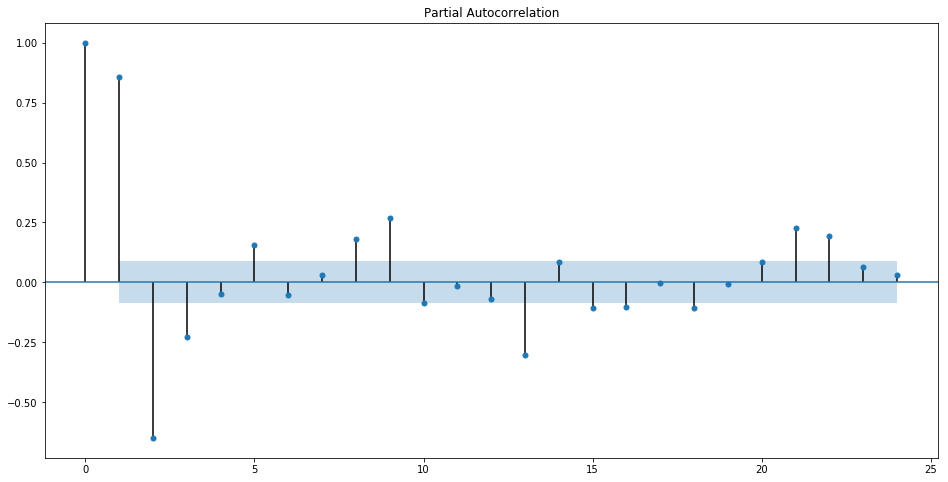

In [147]:
plot_pacf(mumps_series.values, lags=24)
plt.show()

#### Interpreting ACF / PACF
Moving average (MA) 
- The ACF plot will help us identify the order of the MA model. 
- We can find the lag (the q value) for an MA series by determining when the ACF drops off sharply. 

Autoregressive (AR) 
- The ACF will go down gradually without any sharp cut-off.
- The PACF will cut off after the degree of the AR series (the p value). 
- Example: In an AR(1) series, the partial correlation function (PACF) will drop sharply after the first lag


#### Decompose the series

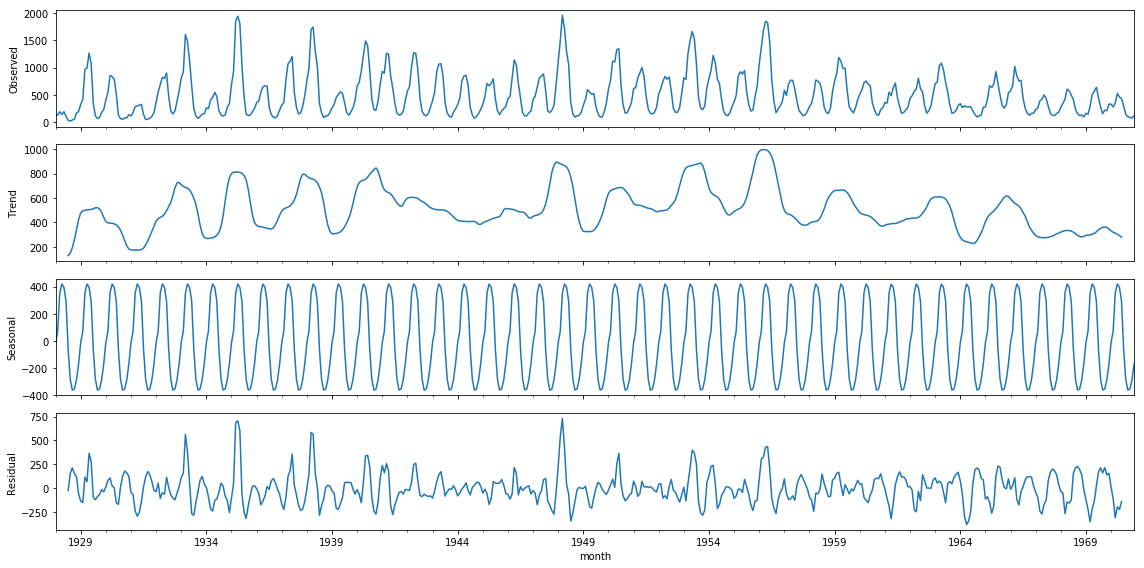

In [448]:
# quick decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose 
mumps_series = data[['month','mumps']].set_index('month')

# model options = additive or multiplicative
# freq parameter??? freq=12 ?
result = seasonal_decompose(mumps_series, model='additive') 
result.plot()
plt.show()

#### Exponential smoothing
Need to update statsmodels

In [161]:
try:
    from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
except:
    print('Import failed')

Import failed


### Time Series Forecasting

In [ ]:
# detrending
# differencing

In [ ]:
# Exponential smoothing vs SARIMA

## Exponential smoothing tutorials
Note, 'Smoothing Factor' is a bit of a misnomer: 
- Values closer to 1 = not very smooth
- Values closer to 0 = smoother

Controls how quickly we will "forget" the last available true observation

#### Double Exponential Smoothing Tutorial 1
Examples from: https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb

In [47]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level (level - intercept)
        beta - float [0.0, 1.0], smoothing parameter for trend (trend - slope, avg value/mean)
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [51]:
def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)
        plt.show()

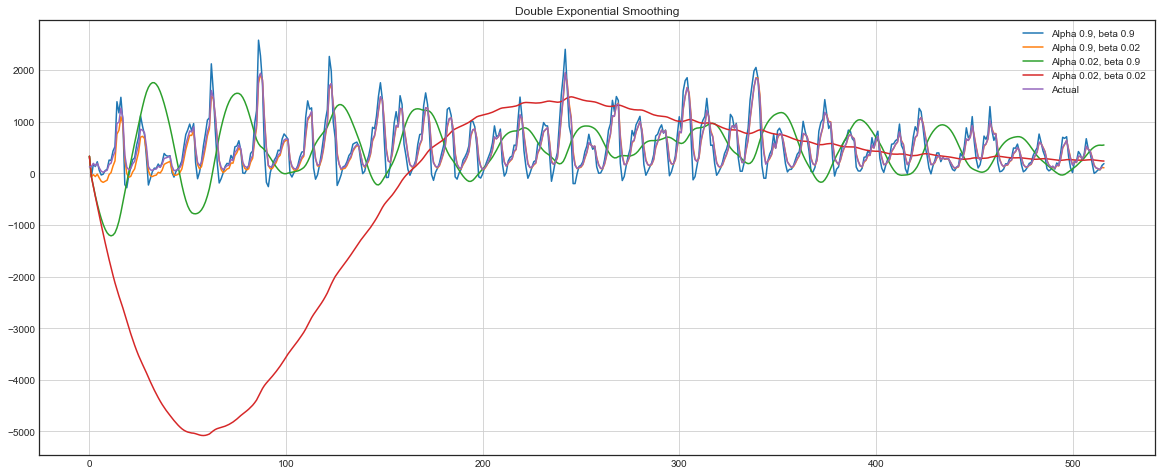

In [449]:
plotDoubleExponentialSmoothing(mumps_series.mumps, alphas=[0.9, 0.02], betas=[0.9, 0.02])

#### Triple Exponential Smoothing Tutorial 1
Examples from: https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb

In [456]:
my_series = mumps_series.reset_index().mumps # need a series with int indices 
my_slen = 12 # seem to be yearly seasons in the mumps data

In [457]:
'''
How does this work?
Get's the intial trend for each series, then divides by # of seasonal components
- For every season, subtract it's first value from it's second value. Then divide by # of seasonal components
- Sum those and divide by # of seasonal components 
'''
def initial_trend(series, slen):
        sum = 0.0
        for i in range(slen):
            sum += float(series[i+slen] - series[i]) / slen
        return sum / slen 

In [458]:
initial_trend(my_series, my_slen)

32.40277777777778

In [459]:
def initial_seasonal_components(series, slen):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(series)/slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(series.values[slen*j:slen*j+slen])/float(slen))
        # let's calculate initial values
        for i in range(slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals  

In [460]:
seasonals = initial_seasonal_components(my_series, my_slen)
seasonals

{0: -12.281007751937993,
 1: 71.323643410852725,
 2: 346.69573643410854,
 3: 410.32364341085264,
 4: 387.81201550387601,
 5: 284.20736434108534,
 6: -58.908914728682177,
 7: -277.14147286821697,
 8: -356.60658914728674,
 9: -348.67635658914719,
 10: -281.60658914728668,
 11: -165.14147286821711}

#### Exponential Smoothing Tutorial 2
Examples from: https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

In [55]:
my_series = [3,10,12,13,12,10,12]

In [69]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

weighted_average(my_series, [0.1, 0.2, 0.3, 0.4])

11.500000000000002

## Box-Jenkins ARIMA 
Popular time series forecasting method

# Appendix

### Time series resources
Triple Exponential Smoothing:
- https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb
- https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

### Potential features
- Months since start of series (time increasing)
- Year
- Month of year
- Seasons: spring, fall, winter
- Weather: average high temp, average low temp
- Child population in NYC (or total population) 



### Infectious diseases
#### Research / reading:
- https://en.wikipedia.org/wiki/Mumps
- https://en.wikipedia.org/wiki/Mumps_vaccine
- https://www1.nyc.gov/assets/doh/downloads/pdf/bicentennial/historical-booklet.pdf
- https://people.maths.bris.ac.uk/~magpn/Research/LSTS/STSIntro.html (features these datasets)


#### Notes on mumps:
- Before the introduction of a vaccine, mumps was a common childhood disease worldwide.
- Larger outbreaks of disease would typically occur every two to five years. 
- Children between the ages of five and nine were most commonly affected.
- In the more northerly and southerly regions of the world it is more common in the winter and spring.
- First (short-term) vaccine invented in 1948, improved vaccines became commercially available in the 1960s.